In [10]:
import numpy as np
from skimage import color

In [21]:
l_range = np.arange(0,101,0.01)
a_range = np.arange(-110,111,10)
b_range = np.arange(-110,111,10)
print(l_range.shape, a_range.shape, b_range.shape)
ll, aa, bb = np.meshgrid(l_range, a_range, b_range)
bb.shape

(10100,) (23,) (23,)


(23, 10100, 23)

In [22]:
lab = np.c_[ll.reshape(-1), aa.reshape(-1), bb.reshape(-1)]
lab.shape

(5342900, 3)

In [23]:
L, a, b = lab[..., 0], lab[..., 1], lab[..., 2]
y = (L + 16.) / 116.
x = (a / 500.) + y
z = y - (b / 200.)

invalid = np.logical_or.reduce((x<0, y<0, z<0))

x = np.ma.array(x, mask=invalid)
y = np.ma.array(y, mask=invalid)
z = np.ma.array(z, mask=invalid)
print(np.sum(x.mask))
xyz = np.ma.stack([x, y, z], axis=-1)

mask = xyz > 0.2068966
xyz[mask] = np.ma.power(xyz[mask], 3.)
xyz[~mask] = (xyz[~mask] - 16.0 / 116.) / 7.787

# rescale to the reference white (illuminant)
xyz *= np.array([0.95047, 1., 1.08883]).reshape(-1,3)

xyz.mask |= np.repeat((xyz < 0).any(axis=1)[:,None], 3, axis=1)
print(np.sum(xyz.mask) / 3)

545534
1080594.0


In [24]:
L, a, b = lab[..., 0], lab[..., 1], lab[..., 2]
y = (L + 16.) / 116.
x = (a / 500.) + y
z = y - (b / 200.)

invalid = np.logical_or.reduce((x<0, y<0, z<0))

# x = np.ma.array(x, mask=z<0)
# y = np.ma.array(y, mask=z<0)
# z = np.ma.array(z, mask=z<0)
# print(np.sum(x.mask))
z[z<0] = 0
xyz = np.ma.stack([x, y, z], axis=-1)

mask = xyz > 0.2068966
xyz[mask] = np.ma.power(xyz[mask], 3.)
xyz[~mask] = (xyz[~mask] - 16.0 / 116.) / 7.787

# rescale to the reference white (illuminant)
xyz *= np.array([0.95047, 1., 1.08883]).reshape(-1,3)

xyz.mask |= np.repeat((xyz < 0).any(axis=1)[:,None], 3, axis=1)
print(np.sum(xyz.mask) / 3)

1080594.0


In [25]:
xyz_from_rgb = np.array([[0.412453, 0.357580, 0.180423],
                         [0.212671, 0.715160, 0.072169],
                         [0.019334, 0.119193, 0.950227]])
rgb_from_xyz = np.linalg.inv(xyz_from_rgb)

In [26]:
rgb = xyz.data @ rgb_from_xyz.T.astype(xyz.dtype)
rgb = np.ma.array(rgb, mask=xyz.mask)

mask = rgb > 0.0031308
rgb[mask] = 1.055 * np.ma.power(rgb[mask], 1 / 2.4) - 0.055
rgb[~mask] *= 12.92

rgb = np.ma.array(rgb)

rgb.mask |= np.repeat((rgb < 0).any(axis=1)[:,None], 3, axis=1)
rgb.mask |= np.repeat((rgb > 1).any(axis=1)[:,None], 3, axis=1)
print(np.sum(rgb.mask) / 3)

4522867.0


In [27]:
lab[~(rgb.mask.any(axis=1))]

array([[ 82.61, -80.  ,  70.  ],
       [ 82.62, -80.  ,  70.  ],
       [ 82.63, -80.  ,  70.  ],
       ...,
       [ 61.46,  90.  , -50.  ],
       [ 61.47,  90.  , -50.  ],
       [ 61.48,  90.  , -50.  ]])

In [28]:
lab_unique, lab_idx = np.unique(lab[~(rgb.mask.any(axis=1))][:,1:], return_index=True, axis=0)
lab_idx.shape


(229,)

In [12]:
lab_unique

array([[ -80,   70],
       [ -80,   80],
       [ -70,   40],
       [ -70,   50],
       [ -70,   60],
       [ -70,   70],
       [ -70,   80],
       [ -60,   10],
       [ -60,   20],
       [ -60,   30],
       [ -60,   40],
       [ -60,   50],
       [ -60,   60],
       [ -60,   70],
       [ -60,   80],
       [ -50,  -10],
       [ -50,    0],
       [ -50,   10],
       [ -50,   20],
       [ -50,   30],
       [ -50,   40],
       [ -50,   50],
       [ -50,   60],
       [ -50,   70],
       [ -50,   80],
       [ -40,  -20],
       [ -40,  -10],
       [ -40,    0],
       [ -40,   10],
       [ -40,   20],
       [ -40,   30],
       [ -40,   40],
       [ -40,   50],
       [ -40,   60],
       [ -40,   70],
       [ -40,   80],
       [ -30,  -30],
       [ -30,  -20],
       [ -30,  -10],
       [ -30,    0],
       [ -30,   10],
       [ -30,   20],
       [ -30,   30],
       [ -30,   40],
       [ -30,   50],
       [ -30,   60],
       [ -30,   70],
       [ -30,

In [13]:
np.sort(lab[~(rgb.mask.any(axis=1))][lab_idx], axis=0)

array([[   0,  -80, -100],
       [   5,  -80,  -90],
       [   5,  -70,  -90],
       [   5,  -70,  -90],
       [   5,  -70,  -80],
       [   5,  -70,  -80],
       [   5,  -70,  -80],
       [   5,  -60,  -80],
       [   5,  -60,  -80],
       [  10,  -60,  -70],
       [  10,  -60,  -70],
       [  10,  -60,  -70],
       [  10,  -60,  -70],
       [  10,  -60,  -70],
       [  10,  -60,  -70],
       [  10,  -50,  -70],
       [  10,  -50,  -60],
       [  10,  -50,  -60],
       [  10,  -50,  -60],
       [  10,  -50,  -60],
       [  10,  -50,  -60],
       [  15,  -50,  -60],
       [  15,  -50,  -60],
       [  15,  -50,  -60],
       [  15,  -50,  -60],
       [  15,  -40,  -50],
       [  15,  -40,  -50],
       [  15,  -40,  -50],
       [  15,  -40,  -50],
       [  15,  -40,  -50],
       [  15,  -40,  -50],
       [  15,  -40,  -50],
       [  15,  -40,  -50],
       [  15,  -40,  -50],
       [  15,  -40,  -50],
       [  20,  -40,  -40],
       [  20,  -30,  -40],
 

### RGB to Lab then quantization

In [2]:
import numpy as np
from skimage import color

In [3]:
step_size = 1
R_range = np.arange(0,255+step_size,step_size)
G_range = np.arange(0,255+step_size,step_size)
B_range = np.arange(0,255+step_size,step_size)
print(R_range.shape, G_range.shape, B_range.shape)
RR, GG, BB = np.meshgrid(R_range, G_range, B_range)
BB.shape

(256,) (256,) (256,)


(256, 256, 256)

In [4]:
rgb = np.c_[RR.reshape(-1), GG.reshape(-1), BB.reshape(-1)].astype('uint8')
rgb.shape

(16777216, 3)

In [5]:
lab = color.rgb2lab(rgb)
lab.shape

(16777216, 3)

In [6]:
l, a, b = lab[:,0], lab[:,1], lab[:,2]
l.shape, a.shape, b.shape

((16777216,), (16777216,), (16777216,))

In [7]:
np.max(l), np.min(l), np.max(a), np.min(a), np.max(b), np.min(b)

(100.0,
 0.0,
 98.2330538631131,
 -86.18302974439501,
 94.47812227647825,
 -107.85730020669489)

In [89]:
np.unique(np.round(a/grid_size)*grid_size), np.unique(np.round(b/grid_size)*grid_size)

(array([-90., -80., -70., -60., -50., -40., -30., -20., -10.,  -0.,  10.,
         20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 array([-110., -100.,  -90.,  -80.,  -70.,  -60.,  -50.,  -40.,  -30.,
         -20.,  -10.,    0.,   10.,   20.,   30.,   40.,   50.,   60.,
          70.,   80.,   90.]))

In [92]:
np.unique(b.round()), np.unique(np.ceil(b/10)*10), np.unique(np.floor(b/10)*10)

(array([-108., -107., -106., -105., -104., -103., -102., -101., -100.,
         -99.,  -98.,  -97.,  -96.,  -95.,  -94.,  -93.,  -92.,  -91.,
         -90.,  -89.,  -88.,  -87.,  -86.,  -85.,  -84.,  -83.,  -82.,
         -81.,  -80.,  -79.,  -78.,  -77.,  -76.,  -75.,  -74.,  -73.,
         -72.,  -71.,  -70.,  -69.,  -68.,  -67.,  -66.,  -65.,  -64.,
         -63.,  -62.,  -61.,  -60.,  -59.,  -58.,  -57.,  -56.,  -55.,
         -54.,  -53.,  -52.,  -51.,  -50.,  -49.,  -48.,  -47.,  -46.,
         -45.,  -44.,  -43.,  -42.,  -41.,  -40.,  -39.,  -38.,  -37.,
         -36.,  -35.,  -34.,  -33.,  -32.,  -31.,  -30.,  -29.,  -28.,
         -27.,  -26.,  -25.,  -24.,  -23.,  -22.,  -21.,  -20.,  -19.,
         -18.,  -17.,  -16.,  -15.,  -14.,  -13.,  -12.,  -11.,  -10.,
          -9.,   -8.,   -7.,   -6.,   -5.,   -4.,   -3.,   -2.,   -1.,
           0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
           9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
      

In [98]:
np.unique(np.sign(b) * np.ceil(np.abs(b/10)) * 10),\
np.unique(np.sign(a) * np.ceil(np.abs(a/10)) * 10)

(array([-110., -100.,  -90.,  -80.,  -70.,  -60.,  -50.,  -40.,  -30.,
         -20.,  -10.,    0.,   10.,   20.,   30.,   40.,   50.,   60.,
          70.,   80.,   90.,  100.]),
 array([-90., -80., -70., -60., -50., -40., -30., -20., -10.,   0.,  10.,
         20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [99]:
def conservative_round(x, nearest=10):
    return np.sign(x) * np.ceil(np.abs(x/nearest)) * nearest

In [100]:
grid_size = 10
ab_unique = np.unique(np.c_[conservative_round(a, nearest=grid_size),
                            conservative_round(b, nearest=grid_size)], axis=0)

In [146]:
grid_size = 10
ab_unique = np.unique(np.vstack((np.c_[np.ceil(a/10)*10, np.ceil(b/10)*10],
                                 np.c_[np.floor(a/10)*10, np.floor(b/10)*10],
                                 np.c_[np.ceil(a/10)*10, np.floor(b/10)*10],
                                 np.c_[np.floor(a/10)*10, np.ceil(b/10)*10])), axis=0)

# ab_unique = np.unique(np.vstack((np.c_[conservative_round(a-5, 10), conservative_round(b-5, 10)],
#                                  np.c_[conservative_round(a+5, 10), conservative_round(b+5, 10)])), axis=0)

In [147]:
ab_unique.shape, ab_unique

((309, 2),
 array([[ -90.,   50.],
        [ -90.,   60.],
        [ -90.,   70.],
        [ -90.,   80.],
        [ -90.,   90.],
        [ -80.,   20.],
        [ -80.,   30.],
        [ -80.,   40.],
        [ -80.,   50.],
        [ -80.,   60.],
        [ -80.,   70.],
        [ -80.,   80.],
        [ -80.,   90.],
        [ -70.,    0.],
        [ -70.,   10.],
        [ -70.,   20.],
        [ -70.,   30.],
        [ -70.,   40.],
        [ -70.,   50.],
        [ -70.,   60.],
        [ -70.,   70.],
        [ -70.,   80.],
        [ -70.,   90.],
        [ -60.,  -20.],
        [ -60.,  -10.],
        [ -60.,    0.],
        [ -60.,   10.],
        [ -60.,   20.],
        [ -60.,   30.],
        [ -60.,   40.],
        [ -60.,   50.],
        [ -60.,   60.],
        [ -60.,   70.],
        [ -60.,   80.],
        [ -60.,   90.],
        [ -50.,  -30.],
        [ -50.,  -20.],
        [ -50.,  -10.],
        [ -50.,    0.],
        [ -50.,   10.],
        [ -50.,   20.],
     

In [124]:
from skimage.morphology import convex_hull_image

In [126]:
np.unique(np.round(a/10))

array([-9., -8., -7., -6., -5., -4., -3., -2., -1., -0.,  1.,  2.,  3.,
        4.,  5.,  6.,  7.,  8.,  9., 10.])

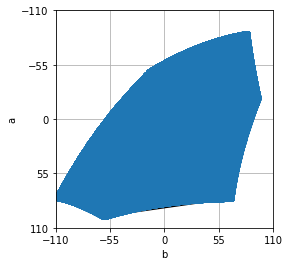

In [128]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

hull = ConvexHull(np.c_[b, a])

fig = plt.figure()
ax = fig.add_subplot(111)

convex_hull_plot_2d(hull, ax=ax)

ax.set_xlim([-110, 110]); ax.set_ylim([110, -110])
ax.set_xticks([-110,-55,0,55,110]); ax.set_yticks([110,55,0,-55,-110])
ax.set_xlabel('b'); ax.set_ylabel('a')
ax.set_aspect('equal', adjustable='box')
ax.grid()

In [134]:
hull.simplices

array([[16711680, 16776960],
       [   65280, 16776960],
       [   65535,      255],
       ...,
       [16711689, 16711690],
       [16711687, 16711688],
       [16711687, 16711686]], dtype=int32)

### Visualization

In [1]:
from scipy.interpolate import interp2d

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

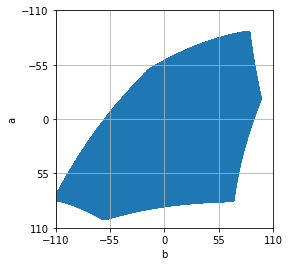

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(b, a)
# plt.plot(b, a, 'o')
ax.invert_yaxis()
ax.set_xlim([-110, 110]); ax.set_ylim([110, -110])
ax.set_xticks([-110,-55,0,55,110]); ax.set_yticks([110,55,0,-55,-110])
ax.set_xlabel('b'); ax.set_ylabel('a')
ax.set_aspect('equal', adjustable='box')
ax.grid()

plt.show()

In [47]:
grids = np.load('/Colorization/src/pts_in_hull.npy')
grids

array([[ -90,   50],
       [ -90,   60],
       [ -90,   70],
       [ -90,   80],
       [ -90,   90],
       [ -80,   20],
       [ -80,   30],
       [ -80,   40],
       [ -80,   50],
       [ -80,   60],
       [ -80,   70],
       [ -80,   80],
       [ -80,   90],
       [ -70,    0],
       [ -70,   10],
       [ -70,   20],
       [ -70,   30],
       [ -70,   40],
       [ -70,   50],
       [ -70,   60],
       [ -70,   70],
       [ -70,   80],
       [ -70,   90],
       [ -60,  -20],
       [ -60,  -10],
       [ -60,    0],
       [ -60,   10],
       [ -60,   20],
       [ -60,   30],
       [ -60,   40],
       [ -60,   50],
       [ -60,   60],
       [ -60,   70],
       [ -60,   80],
       [ -60,   90],
       [ -50,  -30],
       [ -50,  -20],
       [ -50,  -10],
       [ -50,    0],
       [ -50,   10],
       [ -50,   20],
       [ -50,   30],
       [ -50,   40],
       [ -50,   50],
       [ -50,   60],
       [ -50,   70],
       [ -50,   80],
       [ -50,

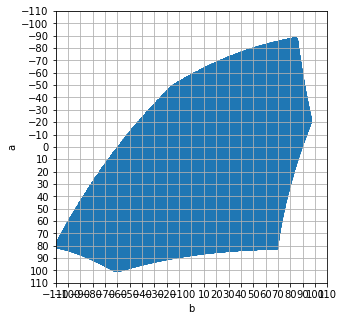

In [112]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(b, a)
# plt.plot(b, a, 'o')
ax.invert_yaxis()
ax.set_xlim([-110, 110]); ax.set_ylim([110, -110])
#ax.set_xticks([-110,-55,0,55,110]); ax.set_yticks([110,55,0,-55,-110])
ax.set_xticks(np.arange(-110,111,10)); ax.set_yticks(np.arange(110,-111,-10))
ax.set_xlabel('b'); ax.set_ylabel('a')
ax.grid()
ax.set_aspect('equal', adjustable='box')

plt.show()

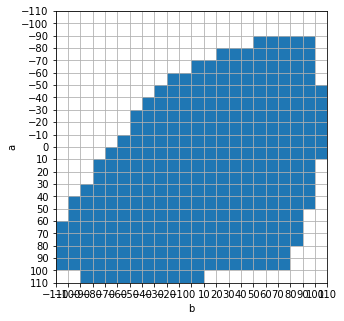

In [67]:
W = H = 10

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

for i in range(grids.shape[0]):
    rect = patches.Rectangle((grids[i,1], grids[i,0]), W, H)
    ax.add_patch(rect)
# plt.plot(b, a, 'o')
ax.invert_yaxis()
ax.set_xlim([-110, 110]); ax.set_ylim([110, -110])
#ax.set_xticks([-110,-55,0,55,110]); ax.set_yticks([110,55,0,-55,-110])
ax.set_xticks(np.arange(-110,111,10)); ax.set_yticks(np.arange(110,-111,-10))
ax.set_xlabel('b'); ax.set_ylabel('a')
ax.grid()
ax.set_aspect('equal', adjustable='box')

plt.show()

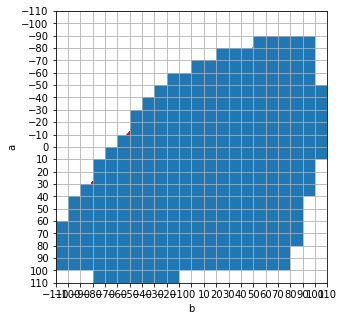

In [114]:
W = H = 10

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

for i in range(ab_unique.shape[0]):
    rect = patches.Rectangle((ab_unique[i,1], ab_unique[i,0]), W, H)
    ax.add_patch(rect)

ax.scatter(b, a, c='r')

ax.invert_yaxis()
ax.set_xlim([-110, 110]); ax.set_ylim([110, -110])
#ax.set_xticks([-110,-55,0,55,110]); ax.set_yticks([110,55,0,-55,-110])
ax.set_xticks(np.arange(-110,111,10)); ax.set_yticks(np.arange(110,-111,-10))
ax.set_xlabel('b'); ax.set_ylabel('a')
ax.grid()
ax.set_aspect('equal', adjustable='box')

plt.show()

### Github ideepcolor

In [135]:
import numpy as np
from skimage import color

l_range = np.arange(0,101,0.01)
a_range = np.arange(-110,111,10)
b_range = np.arange(-110,111,10)
print(l_range.shape, a_range.shape, b_range.shape)
ll, aa, bb = np.meshgrid(l_range, a_range, b_range)
bb.shape

(10100,) (23,) (23,)


(23, 10100, 23)

In [138]:
pts_lab = np.c_[ll.reshape(-1), aa.reshape(-1), bb.reshape(-1)]
pts_lab.shape

(5342900, 3)

In [141]:
pts_rgb = (255 * np.clip(color.lab2rgb(pts_lab), 0, 1)).astype('uint8')
pts_lab_back = color.rgb2lab(pts_rgb)

pts_lab_diff = np.linalg.norm(pts_lab - pts_lab_back, axis=-1)
mask = pts_lab_diff < 1.0
mask.shape

(5342900,)

In [142]:
pts_lab[mask]

862697

In [143]:
lab_unique, lab_idx = np.unique(pts_lab[mask][:,1:], return_index=True, axis=0)
lab_idx.shape


(230,)

In [145]:
lab_unique

array([[ -80.,   60.],
       [ -80.,   70.],
       [ -80.,   80.],
       [ -70.,   30.],
       [ -70.,   40.],
       [ -70.,   50.],
       [ -70.,   60.],
       [ -70.,   70.],
       [ -70.,   80.],
       [ -60.,   10.],
       [ -60.,   20.],
       [ -60.,   30.],
       [ -60.,   40.],
       [ -60.,   50.],
       [ -60.,   60.],
       [ -60.,   70.],
       [ -60.,   80.],
       [ -50.,  -10.],
       [ -50.,    0.],
       [ -50.,   10.],
       [ -50.,   20.],
       [ -50.,   30.],
       [ -50.,   40.],
       [ -50.,   50.],
       [ -50.,   60.],
       [ -50.,   70.],
       [ -50.,   80.],
       [ -40.,  -20.],
       [ -40.,  -10.],
       [ -40.,    0.],
       [ -40.,   10.],
       [ -40.,   20.],
       [ -40.,   30.],
       [ -40.,   40.],
       [ -40.,   50.],
       [ -40.,   60.],
       [ -40.,   70.],
       [ -40.,   80.],
       [ -40.,   90.],
       [ -30.,  -30.],
       [ -30.,  -20.],
       [ -30.,  -10.],
       [ -30.,    0.],
       [ -3